In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

hermanus za
isangel vu
fare pf
arraial do cabo br
havelock us
bluff nz
mount gambier au
saravan la
almeirim br
hermanus za
bethel us
saint-felicien ca
cape town za
narsaq gl
taolanaro mg
cape town za
nioro ml
bayji iq
hermanus za
pueblo us
cabo san lucas mx
sorkjosen no
blackwater au
cabo san lucas mx
busselton au
san juan ar
vaini to
tilichiki ru
henties bay na
graaff-reinet za
rikitea pf
lianzhou cn
waw sd
margate za
albany au
faanui pf
caxito ao
ushuaia ar
sarkand kz
marzuq ly
puerto ayora ec
grand-santi gf
villa oliva py
miraflores co
bilma ne
cherskiy ru
half moon bay us
butaritari ki
tete mz
sao filipe cv
georgetown sh
castro cl
cape town za
hobart au
carnarvon au
hobart au
trelew ar
pochutla mx
arraial do cabo br
laguna br
byron bay au
korla cn
kaitangata nz
taolanaro mg
atuona pf
ancud cl
bengkulu id
port elizabeth za
ye mm
taolanaro mg
punta arenas cl
amderma ru
kapaa us
port alfred za
veraval in
ahipara nz
whitehorse ca
mataura pf
turukhansk ru
port lincoln au
rikitea pf
cape

stillwater us
bereda so
ewa beach us
fredericksburg us
ambon id
barentsburg sj
vardo no
cherskiy ru
yellowknife ca
airai pw
chokurdakh ru
qaanaaq gl
vao nc
hithadhoo mv
port elizabeth za
hamilton bm
chokurdakh ru
verkhoyansk ru
mataura pf
mataura pf
ponta do sol cv
mar del plata ar
hamilton bm
waycross us
cidreira br
agirish ru
bredasdorp za
rikitea pf
punta arenas cl
hobart au
tczew pl
assiniboia ca
viedma ar
vao nc
fortuna us
saleaula ws
columbia us
krasnoarmeyskoye ru
busselton au
rikitea pf
amderma ru
east london za
lewistown us
biscarrosse fr
hasaki jp
pringsewu id
te anau nz
bambous virieux mu
new norfolk au
morros br
rikitea pf
vila velha br
acu br
arraial do cabo br
samusu ws
saint george bm
taolanaro mg
blythe us
new norfolk au
mataura pf
broken hill au
cape town za
praia da vitoria pt
illoqqortoormiut gl
kaduna ng
hobart au
corinto ni
kokstad za
mataura pf
bredasdorp za
tongling cn
punta arenas cl
qaanaaq gl
paragominas br
busselton au
palabuhanratu id
gamba ga
bluff nz
jahro

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

647

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | isangel
Processing Record 3 of Set 1 | fare
Processing Record 4 of Set 1 | arraial do cabo
Processing Record 5 of Set 1 | havelock
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | mount gambier
Processing Record 8 of Set 1 | saravan
Processing Record 9 of Set 1 | almeirim
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | saint-felicien
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | narsaq
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | nioro
Processing Record 16 of Set 1 | bayji
Processing Record 17 of Set 1 | pueblo
Processing Record 18 of Set 1 | cabo san lucas
Processing Record 19 of Set 1 | sorkjosen
Processing Record 20 of Set 1 | blackwater
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | san juan
Processing Record 23 of Set 1 | vaini
Processing Record 24 of Set 1 | 

Processing Record 36 of Set 4 | nikolskoye
Processing Record 37 of Set 4 | port hardy
Processing Record 38 of Set 4 | hilo
Processing Record 39 of Set 4 | ust-nera
Processing Record 40 of Set 4 | dargaville
Processing Record 41 of Set 4 | pisco
Processing Record 42 of Set 4 | vila velha
Processing Record 43 of Set 4 | coihaique
Processing Record 44 of Set 4 | san juan del rio
Processing Record 45 of Set 4 | soyo
Processing Record 46 of Set 4 | miri
Processing Record 47 of Set 4 | kerteh
City not found. Skipping...
Processing Record 48 of Set 4 | essau
Processing Record 49 of Set 4 | lagoa
Processing Record 50 of Set 4 | nemuro
Processing Record 1 of Set 5 | batagay-alyta
Processing Record 2 of Set 5 | lorengau
Processing Record 3 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 4 of Set 5 | lazaro cardenas
Processing Record 5 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 6 of Set 5 | kitami
Processing Record 7 of Set 5 | upernavik
Processing 

Processing Record 24 of Set 8 | ambon
Processing Record 25 of Set 8 | qaanaaq
Processing Record 26 of Set 8 | verkhoyansk
Processing Record 27 of Set 8 | ponta do sol
Processing Record 28 of Set 8 | waycross
Processing Record 29 of Set 8 | agirish
Processing Record 30 of Set 8 | tczew
Processing Record 31 of Set 8 | assiniboia
Processing Record 32 of Set 8 | viedma
Processing Record 33 of Set 8 | fortuna
Processing Record 34 of Set 8 | columbia
Processing Record 35 of Set 8 | krasnoarmeyskoye
Processing Record 36 of Set 8 | lewistown
Processing Record 37 of Set 8 | biscarrosse
Processing Record 38 of Set 8 | pringsewu
Processing Record 39 of Set 8 | te anau
Processing Record 40 of Set 8 | morros
Processing Record 41 of Set 8 | acu
Processing Record 42 of Set 8 | blythe
Processing Record 43 of Set 8 | broken hill
Processing Record 44 of Set 8 | praia da vitoria
Processing Record 45 of Set 8 | kaduna
Processing Record 46 of Set 8 | corinto
Processing Record 47 of Set 8 | kokstad
Processi

Processing Record 11 of Set 12 | verkhnyaya inta
Processing Record 12 of Set 12 | cairns
Processing Record 13 of Set 12 | acobamba
Processing Record 14 of Set 12 | kaspiyskiy
Processing Record 15 of Set 12 | nogales
Processing Record 16 of Set 12 | carbonia
Processing Record 17 of Set 12 | nzerekore
Processing Record 18 of Set 12 | prince albert
Processing Record 19 of Set 12 | vila
Processing Record 20 of Set 12 | jiayuguan
Processing Record 21 of Set 12 | tucuman
Processing Record 22 of Set 12 | okitipupa
Processing Record 23 of Set 12 | chapaevsk
Processing Record 24 of Set 12 | aversa
Processing Record 25 of Set 12 | trenggalek
Processing Record 26 of Set 12 | shingu
Processing Record 27 of Set 12 | taga
Processing Record 28 of Set 12 | high rock
Processing Record 29 of Set 12 | san luis de la paz
Processing Record 30 of Set 12 | sumbawa
City not found. Skipping...
Processing Record 31 of Set 12 | gualeguaychu
Processing Record 32 of Set 12 | yakeshi
Processing Record 33 of Set 12 

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,67.80,73,70,14.85,ZA,2022-01-25 20:02:17
1,Isangel,-19.5500,169.2667,81.95,80,10,2.66,VU,2022-01-25 20:06:07
2,Fare,-16.7000,-151.0167,80.44,79,97,15.93,PF,2022-01-25 20:07:28
3,Arraial Do Cabo,-22.9661,-42.0278,80.46,74,0,27.63,BR,2022-01-25 20:03:27
4,Havelock,34.8791,-76.9013,56.05,71,100,1.99,US,2022-01-25 20:07:29
5,Bluff,-46.6000,168.3333,52.81,86,100,7.49,NZ,2022-01-25 20:00:55
6,Mount Gambier,-37.8333,140.7667,70.83,68,17,5.14,AU,2022-01-25 20:07:29
7,Saravan,39.7196,45.6483,16.45,84,18,6.78,AM,2022-01-25 20:07:29
8,Almeirim,-1.5233,-52.5817,87.78,56,100,5.59,BR,2022-01-25 20:07:30
9,Bethel,41.3712,-73.4140,41.36,60,20,1.01,US,2022-01-25 20:03:17


In [19]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2022-01-25 20:02:17,-34.4187,19.2345,67.80,73,70,14.85
1,Isangel,VU,2022-01-25 20:06:07,-19.5500,169.2667,81.95,80,10,2.66
2,Fare,PF,2022-01-25 20:07:28,-16.7000,-151.0167,80.44,79,97,15.93
3,Arraial Do Cabo,BR,2022-01-25 20:03:27,-22.9661,-42.0278,80.46,74,0,27.63
4,Havelock,US,2022-01-25 20:07:29,34.8791,-76.9013,56.05,71,100,1.99
5,Bluff,NZ,2022-01-25 20:00:55,-46.6000,168.3333,52.81,86,100,7.49
6,Mount Gambier,AU,2022-01-25 20:07:29,-37.8333,140.7667,70.83,68,17,5.14
7,Saravan,AM,2022-01-25 20:07:29,39.7196,45.6483,16.45,84,18,6.78
8,Almeirim,BR,2022-01-25 20:07:30,-1.5233,-52.5817,87.78,56,100,5.59
9,Bethel,US,2022-01-25 20:03:17,41.3712,-73.4140,41.36,60,20,1.01


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

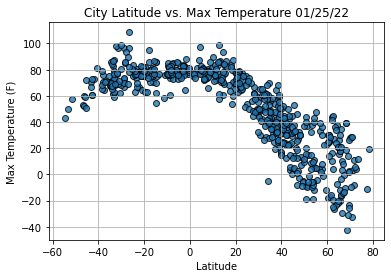

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

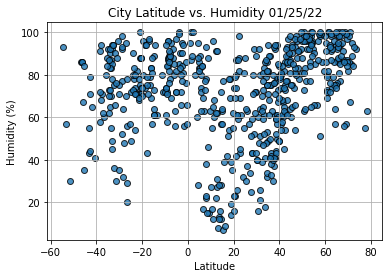

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

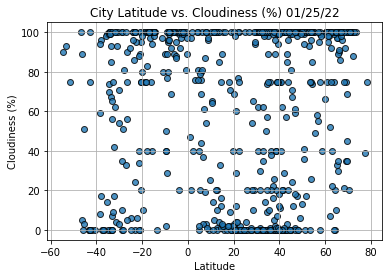

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

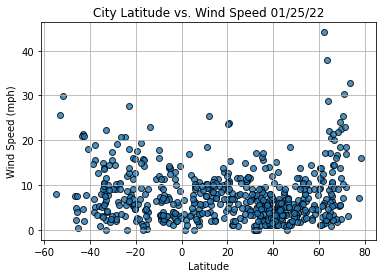

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()